# Додаткові завдання №4

## Задача 1.2.15
Нехай $\Omega = {1, 2, \ldots, 2n}$.
Всiм числам приписанi ймовiрностi, пропорцiйнi логарифмам цих чисел.
Знайти цi ймовiрностi.
Знайти ймовiрнiсть того, що в результатi експерименту з’явиться:
1. парне число;
2. непарне число.

### Завдання 1
Реалізуйте випадкову величину, описану в умові задачі, за допомогою класу [scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) в залежності від параметра $n$.

Створіть дві випадкові величини для:
- $n = 10$;
- $n = 25$.

In [20]:
import numpy as np
import math
from scipy.stats import rv_discrete

def log(n):
    x = np.arange(1, 2*n + 1)
    p = np.log(x)
    k = 1 / math.log(math.factorial(2*n))
    p *= k
    logg = rv_discrete(name = 'log', values = (x, p))
    return logg
log(10)
log(25)

### Завдання 2
Зобразіть графічно функцію щільності, функцію розподілу та гістограму $10000$ значень отриманої випадкової величини в залежності від параметра $n$:
- $n = 10$;
- $n = 25$.

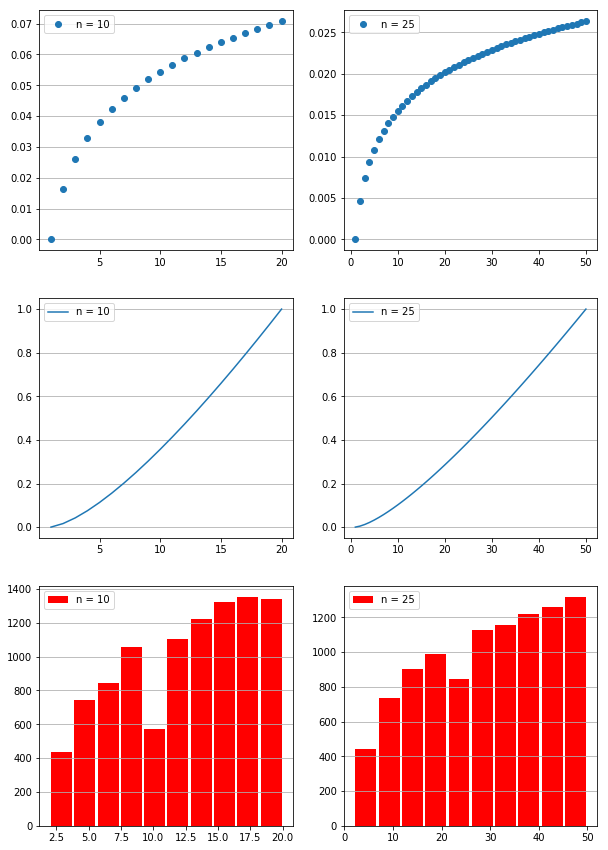

In [37]:
n1 = [10,25]

f, axes = plt.subplots(3,len(n1),figsize = (10,15))
for i,n in enumerate(n1):
    x = np.arange(1,2*n+1)
    r = log(n)
    axes[0,i].plot(x,r.pmf(x), 'o', label = 'n = {}'.format(n))
    axes[1,i].plot(x,r.cdf(x), label = 'n = {}'.format(n))
    axes[2,i].hist(r.rvs(size = 10000), label = 'n = {}'.format(n), rwidth = 0.9, color = 'red')
    for j in range(3):
        axes[j,i].grid(axis = 'y')
        axes[j,i].legend(loc = 2)
plt.show()
    


### Завдання 3
Напишіть функцію для обрахунку теоретичної (через щільність отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [33]:
n1 = [10,25]
for n in n1:
    r = log(n)
    pair = np.arange(2,2*n+1,2)
    odd = np.arange(1,2*n+1,2)
    y = r.pmf(pair)
    y1 = r.pmf(odd)
    print('n = ', n)
    print('Probability of pair number = {}'.format(sum(y)))
    print('Probability of odd number = {} \n'.format(sum(y1)))

 


n =  10
Probability of pair number = 0.5205046299279227
Probability of odd number = 0.47949537007207715 

n =  25
Probability of pair number = 0.5073640739858903
Probability of odd number = 0.4926359260141097 



### Завдання 4
Напишіть функцію для обрахунку еміричної (симулюванням $1000000$ значень отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [34]:
from collections import Counter as c

n1 = [10,25]

for n in n1:
    r = log(n)
    pair = np.arange(2,2*n+1,2)
    odd = np.arange(1,2*n+1,2)
        
    counter = c(r.rvs(size = 1000000))
    y = []
    for i in pair:
        y.append(counter[i])
        
    num_pair = sum(y)
    num_odd = sum(counter.values()) - num_pair
    res1 = num_pair/1000000
    res2 = num_odd/1000000
    print('n = ', n)
    print('Probability of pair number = {}'.format(res1))
    print('Probability of not pair number = {} \n'.format(res2))
      



n =  10
Probability of pair number = 0.521184
Probability of not pair number = 0.478816 

n =  25
Probability of pair number = 0.50753
Probability of not pair number = 0.49247 

